<a href="https://colab.research.google.com/github/AminHasibul/Conspiracy_Againtst_Covid_Vaccines_detection/blob/main/Data_analysis_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip 

--2022-09-13 03:56:17--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   249MB/s    in 1.6s    

2022-09-13 03:56:18 (249 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]



In [2]:
!pip3 install virtualenv


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!virtualenv myenv


created virtual environment CPython3.7.13.final.0-64 in 208ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==22.2.2, setuptools==65.3.0, wheel==0.37.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [4]:
!source /content/myenv/bin/activate myenv; 

In [5]:
!pip install tensorflow==1.14; 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install bert-serving-server; 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!unzip uncased_L-12_H-768_A-12.zip

Archive:  uncased_L-12_H-768_A-12.zip
replace uncased_L-12_H-768_A-12/bert_model.ckpt.meta? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
replace uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [7]:
!nohup bert-serving-start -max_seq_len=128 -model_dir=uncased_L-12_H-768_A-12 > out.file 2>&1 &

In [8]:
!pip3 install -U bert-serving-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from bert_serving.client import BertClient


In [10]:
bc = BertClient()

In [11]:
token_list = []

In [12]:
from nltk.tokenize import word_tokenize
from numpy import savetxt
from gensim.models import KeyedVectors
import nltk
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [13]:

# If not previously performed:
# nltk.download('stopwords')
#from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
stemming = PorterStemmer()
stops = set(stopwords.words("english"))
def apply_cleaning_function_to_list(X):
    cleaned_X = []
    for element in X:
        cleaned_X.append(clean_text(element))
    return cleaned_X


def clean_text(raw_text):
    """This function works on a raw text string, and:
        1) changes to lower case
        2) tokenizes (breaks down into words
        3) removes punctuation and non-word text
        4) finds word stems
        5) removes stop words
        6) rejoins meaningful stem words"""
    
    # Convert to lower case
    text = raw_text.lower()
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Keep only words (removes punctuation + numbers)
    # use .isalnum to keep also numbers
    token_words = [w for w in tokens if w.isalpha()]
   
    # Stemming
    stemmed_words = [stemming.stem(w) for w in token_words]
    
    # Remove stop words
    meaningful_words = [w for w in stemmed_words if not w in stops]
    
    token_list.append(meaningful_words)
    # Rejoin meaningful stemmed words
    joined_words = ( " ".join(meaningful_words))
    
    # Return cleaned data
    return joined_words



In [15]:

datas=pd.read_csv('finaldataset.csv',encoding= 'unicode_escape')

dataf=list(datas['comments'])
y=list(datas['label'])
y = np.array(y).astype(int)
#print(dataf[420])
print (y)
# Get text to clean
text_to_clean = dataf
# Clean text
cleaned_text = apply_cleaning_function_to_list(text_to_clean)


text=cleaned_text

print(text)


[1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1
 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
['vaccin failur

In [16]:
tokenized_text = nltk.word_tokenize(str(text))
print (tokenized_text)
word_dis = nltk.FreqDist(tokenized_text)

print(word_dis)

['[', "'vaccin", 'failur', "'", ',', "'thi", 'vaccin', 'trail', 'total', 'conspiraci', "'", ',', "'mom", 'test', 'covid', 'posit', 'get', 'vaccin', "'", ',', "'friend", 'shingl', 'outbreak', 'get', 'covid', 'knew', 'two', 'peopl', 'facebook', 'page', 'report', 'thi', "'", ',', "'whi", 'earth', 'would', 'need', 'bribe', 'thi', 'wa', 'poison', "'", ',', "'vaccin", 'doesnt', 'play', 'push', 'scam', 'dont', 'care', 'health', 'power', 'resist', 'fight', 'back', "'", ',', "'imagin", 'gullibl', 'enough', 'get', 'experiment', 'trial', 'test', 'shot', 'onli', 'find', 'dont', 'work', 'need', 'booster', 'shot', 'year', 'come', "'", ',', "'vaccin", 'junki', 'unit', "'", ',', "'thi", 'great', "'", ',', "'excel", "'", ',', "'fantast", "'", ',', "'great", "'", ',', "'none", 'die', 'good', "'", ',', "'duh", 'vax', 'doe', 'prevent', 'covid', "'", ',', "'vaccin", 'seem', 'like', 'dead', 'infring', "'", ',', "'wave", 'seem', 'decreas', 'vaccin', 'ha', 'releas', "'", ',', "'go", 'die', 'vaccin', 'go', 'wo

In [17]:
import matplotlib.pyplot as plt

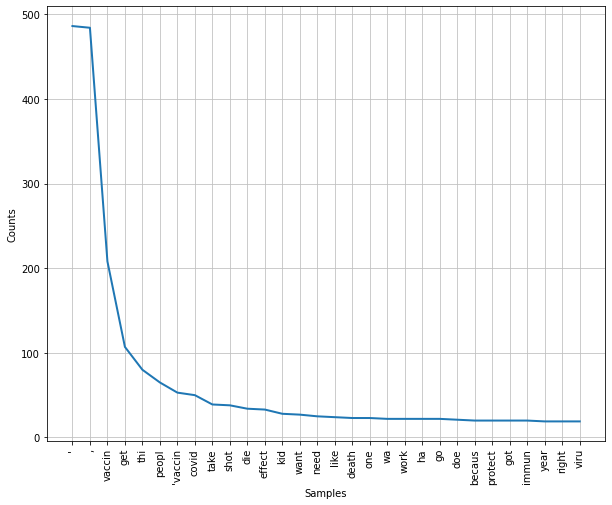

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(10,8))
word_dis.plot(30,cumulative = False)
plt.savefig('hist')



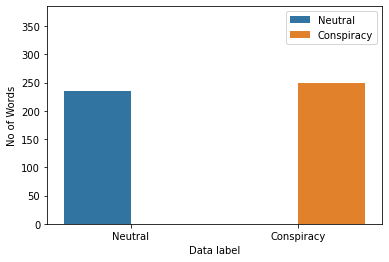

In [19]:
import seaborn as sb
plt.figure()
ax = sb.countplot(x="label",hue="label", data=datas)

plt.ylabel("No of Words")
plt.xlabel("Data label")
plt.ylim(0,len(datas)-100)
plt.legend(['Neutral', 'Conspiracy']);
plt.xticks([0,1],['Neutral', 'Conspiracy'])
plt.show()


In [20]:
print(len(text))

485


In [21]:
X=[]
for j in range(0,len(text)):
     #print(j)
     tokens = word_tokenize(text[j])
     words = [word for word in tokens if word.isalpha()]

     

     
     sum=0
     for i in range(0,len(words)):
        try:
           sum=sum+bc.encode([words[i]])
           print("sum",sum)
        except:
           k=0
           print("sum",sum)
           
     X.append(sum)



Streaming output truncated to the last 5000 lines.
   3.79850239e-01  8.58770847e-01 -8.75768900e-01  1.53566337e+00
  -2.17219397e-01  1.69911355e-01 -3.80579293e-01 -1.46308452e-01
  -1.18300915e-02 -7.35444546e-01 -5.21432102e-01  2.53097147e-01
   2.72446513e-01  3.45727652e-01  4.22780514e-02 -8.89272809e-01
  -4.61305380e-01 -3.40428740e-01 -4.06137109e-02  5.64031720e-01
  -1.78924203e-01 -5.97355843e-01  1.40636489e-02 -6.55748606e-01
  -2.21229970e-01  1.86762720e-01  1.10330187e-01  2.31442809e-01
   1.13195002e-01 -3.95246714e-01 -2.85237968e-01  7.48177826e-01]]
sum [[-8.59727785e-02  3.39525074e-01  2.63885260e-01 -5.14223814e-01
   2.08440647e-01  4.20319289e-01 -2.49662846e-01  5.80435395e-01
   1.25252128e-01  3.60034988e-03 -1.75270975e-01 -3.61143410e-01
   7.39427149e-01  4.99987811e-01 -6.55442923e-02  2.67297655e-01
   5.46871908e-02 -9.38629434e-02 -2.23162770e-01 -5.39135158e-01
  -6.21881366e-01  1.32919729e-01 -5.44183016e-01 -3.04176062e-01
  -1.42677367e-01 -

In [33]:
X = np.array(X).astype(float)

print(len(X))
X=np.reshape(X,(len(X),768))
savetxt('BERT-Score.csv', X, delimiter=',')
print(X.shape)
kf=KFold(n_splits=10, random_state=25, shuffle=True)



485
(485, 768)


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [51]:
acc=[]
prec=[]
reca=[]
f=[]
cm =[]


for train_index, test_index in kf.split(X):
        
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(y_train)
        # clf= LogisticRegression(C = 5,max_iter=4000,random_state = 45)
        # clf.fit(X_train, y_train)
        clf= XGBClassifier()
        clf.fit(X_train, y_train)
        
        # clf= KNeighborsClassifier()
        # clf.fit(X_train, y_train)
        
        # clf= SVC()
        # clf.fit(X_train, y_train)
        
        # clf= GaussianNB()
        # clf.fit(X_train, y_train)

        y_pred = clf.predict( X_test)
        acc.append(accuracy_score(y_test,  y_pred))
        reca.append(recall_score(y_test,  y_pred,
                                            average ='weighted'))
        prec.append(precision_score(y_test,  y_pred,average ='micro'))
        f.append(f1_score(y_test,  y_pred,
                                          average ='micro'))

 
cm.append(metrics.confusion_matrix(y_test, y_pred))


print("Confusion Metrics:" + str(cm))
 
print("accuracy : "+ str(np.mean(acc)))
print("recall : "+ str(np.mean(reca)))
print("precision : "+ str(np.mean(prec)))
print("f1 score : " + str(np.mean(f)))

Confusion Metrics:[array([[4, 1],
       [6, 8]])]
accuracy : 0.6638947368421051
recall : 0.6638947368421051
precision : 0.6638947368421051
f1 score : 0.6638947368421051
